#                       TVS Credit Two wheeler Loan Defaulters

In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,cohen_kappa_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# import the XGBoost function for classification
from xgboost import XGBClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier, RandomForestClassifier

In [5]:
df=pd.read_excel('Tvs.xlsx')

In [6]:
df_TVS=df.copy()

In [7]:
df_TVS.head()

,Customer ID,First_emi_bounce,Recent_bounce_12months,Max_MOB,Times_bounced,EMI,Loan Amount,Tenure,Dealer codes,Product code,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type,DOB,Age,Total_No_of_loans,No_secured_loans,No_unsecured_loans,Maximum amount sanctioned in the Live loans,Number of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),Number of times 30 days past due in last 6 months,Number of times 60 days past due in last 6 months,Number of times 90 days past due in last 6 months,Tier,Def / Non
0,1,0,0,24.000000,0.000000,2432.000000,46500.000000,24.000000,1385.000000,SC,0.000000,12.750000,FEMALE,HOUSEWIFE,OWNED,1974-05-30,40.000000,1,1,0,NaN,0,NaN,NaN,46500.000000,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.000000,1.000000,1495.000000,28168.000000,24.000000,2496.000000,MO,0.000000,13.650000,MALE,SELF,RENT,1967-09-01,47.000000,1,1,0,NaN,0,NaN,NaN,28168.000000,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.000000,0.000000,1707.000000,38900.000000,30.000000,1346.000000,SC,0.000000,12.650000,MALE,SELF,RENT,1983-05-04,31.000000,9,6,3,55000.000000,0,NaN,105000.000000,38900.000000,34.000000,31.000000,31,31,16,TIER 1,0
3,4,0,0,24.000000,0.000000,2128.000000,42900.000000,24.000000,1375.000000,SC,2.000000,9.500000,FEMALE,SAL,RENT,1989-12-10,24.000000,1,1,0,NaN,0,NaN,NaN,42900.000000,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.000000,0.000000,1824.000000,40900.000000,30.000000,4140.000000,MC,0.000000,13.500000,MALE,SAL,RENT,1984-09-24,30.000000,1,1,0,NaN,0,NaN,NaN,40900.000000,NaN,NaN,0,0,0,TIER 1,0


In [8]:
df_TVS.shape

(119528, 32)

In [9]:
df_TVS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count   Dtype         
---  ------                                                         --------------   -----         
 0   Customer ID                                                    119528 non-null  int64         
 1   First_emi_bounce                                               119528 non-null  int64         
 2   Recent_bounce_12months                                         119528 non-null  int64         
 3   Max_MOB                                                        85048 non-null   float64       
 4   Times_bounced                                                  85048 non-null   float64       
 5   EMI                                                            85048 non-null   float64       
 6   Loan Amount                                                    85048 non-null   floa

## Renaming the Columns

In [10]:
df_TVS.rename(columns={'Maximum amount sanctioned for any Two wheeler loan' : 'Max_amount_sanctioned','Dealer codes ' : 'Dealer_codes',
                       'Product code' : 'Product_code','No of advance EMI paid' : 'Advance_EMI_paid','Rate of interest' : 'ROI',
                        'Gender ': 'Gender','Employment type':'Employment_type',
                       'Resident type':'Resident_type','Age ':'Age','Max amount sanctioned':'Max_amt_sanctioned','Loan Amount': 'Loan_Amount',
                      'Tier ': 'Tier', 'Def / Non': 'Def/Non'}, inplace=True)

In [11]:
df_TVS['Def/Non']=df_TVS['Def/Non'].replace({0:'Non-Def',1:'Def'})

In [12]:
df_TVS['Def/Non'].value_counts()

Non-Def    116914
Def          2614
Name: Def/Non, dtype: int64

# Dropping Insignificant Variables

In [13]:
df_TVS.drop(columns=['Customer ID','DOB'], inplace=True)

In [14]:
df_TVS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 30 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   First_emi_bounce                                               119528 non-null  int64  
 1   Recent_bounce_12months                                         119528 non-null  int64  
 2   Max_MOB                                                        85048 non-null   float64
 3   Times_bounced                                                  85048 non-null   float64
 4   EMI                                                            85048 non-null   float64
 5   Loan_Amount                                                    85048 non-null   float64
 6   Tenure                                                         85048 non-null   float64
 7   Dealer_codes                                   

### % of Null Values

In [15]:
df_TVS.shape

(119528, 30)

In [16]:
tot_loan_zero=list(df_TVS[df_TVS['Total_No_of_loans']==0].index)

In [17]:
df_TVS.drop(index=tot_loan_zero,inplace=True)

In [18]:
round(df_TVS.isnull().sum()*100/len(df),2)

First_emi_bounce                                                 0.000000
Recent_bounce_12months                                           0.000000
Max_MOB                                                         25.220000
Times_bounced                                                   25.220000
EMI                                                             25.220000
Loan_Amount                                                     25.220000
Tenure                                                          25.220000
Dealer_codes                                                    25.220000
Product_code                                                    25.220000
Advance_EMI_paid                                                25.220000
ROI                                                             25.220000
Gender                                                          25.220000
Employment_type                                                 25.220000
Resident_type                         

In [19]:
df_TVS.shape

(104468, 30)

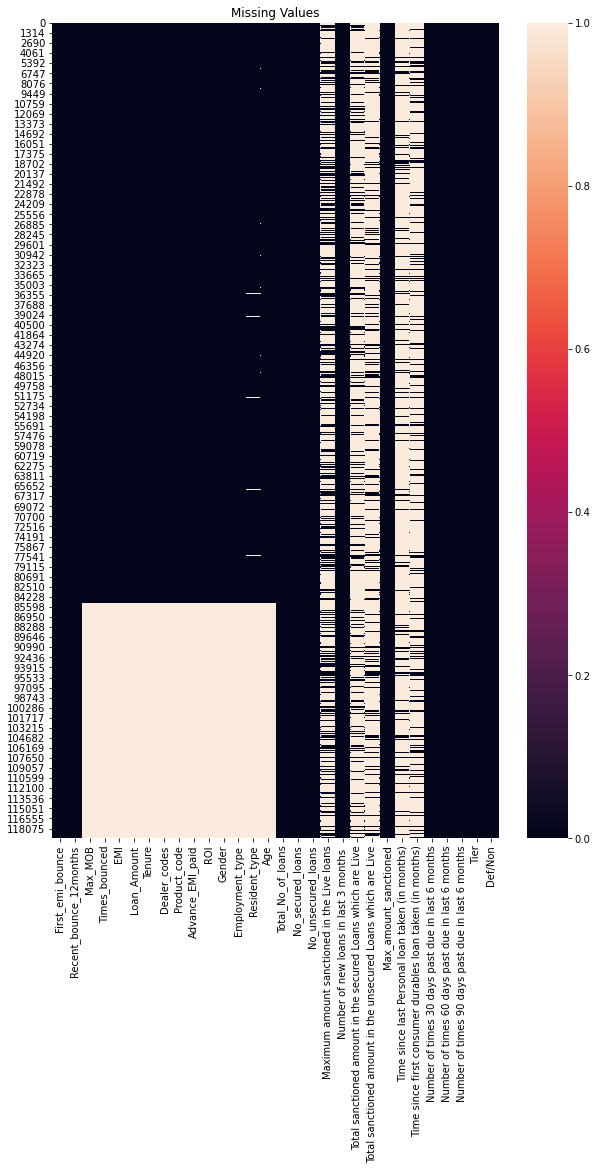

In [20]:
    plt.figure(figsize=(10,15))
    sns.heatmap(df_TVS.isnull())
    plt.title('Missing Values')
    plt.show()

* From the heatmap, it is evident that most of the records are having null values. So we are dropping the records that does not contain atleast 5 non null values

In [21]:
df_TVS=df_TVS.dropna(thresh=5) # each record should contain atleast 5 non null values

In [22]:
df_TVS.shape

(104468, 30)

In [23]:
df_TVS.isnull().sum()

First_emi_bounce                                                     0
Recent_bounce_12months                                               0
Max_MOB                                                          30149
Times_bounced                                                    30149
EMI                                                              30149
Loan_Amount                                                      30149
Tenure                                                           30149
Dealer_codes                                                     30149
Product_code                                                     30149
Advance_EMI_paid                                                 30149
ROI                                                              30149
Gender                                                           30149
Employment_type                                                  30149
Resident_type                                                    30935
Age   

In [24]:
df_TVS['Resident_type'].unique()

array(['OWNED', 'RENT', nan, 'OWENED BY OFFICE'], dtype=object)

In [25]:
df_TVS['Resident_type'].mode()

0    OWNED
dtype: object

In [26]:
df_TVS['Resident_type']=df_TVS['Resident_type'].fillna('OWNED')

*   Since we have null values and its a categorical column, we are replacing null with Mode (OWNED).

In [27]:
df_TVS.isnull().sum()

First_emi_bounce                                                     0
Recent_bounce_12months                                               0
Max_MOB                                                          30149
Times_bounced                                                    30149
EMI                                                              30149
Loan_Amount                                                      30149
Tenure                                                           30149
Dealer_codes                                                     30149
Product_code                                                     30149
Advance_EMI_paid                                                 30149
ROI                                                              30149
Gender                                                           30149
Employment_type                                                  30149
Resident_type                                                        0
Age   

### Outlier Analysis

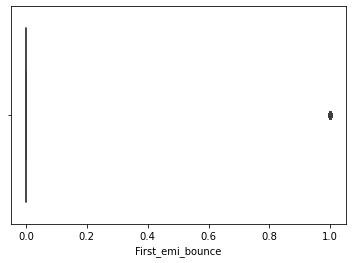

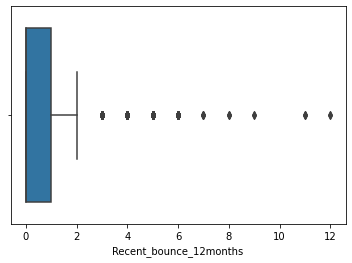

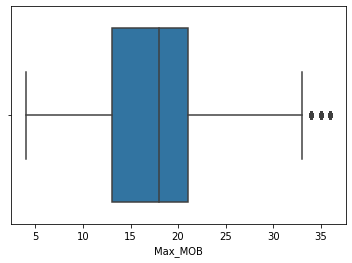

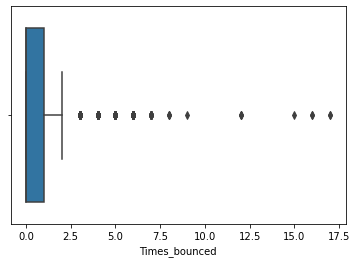

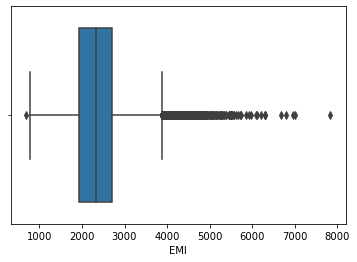

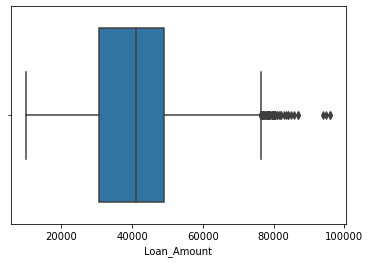

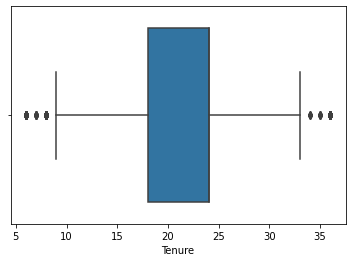

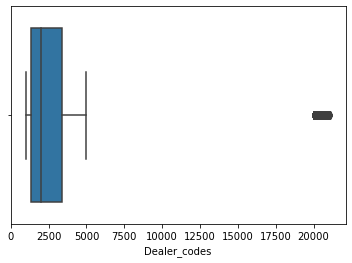

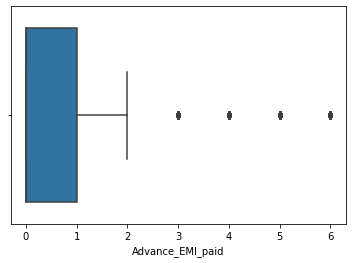

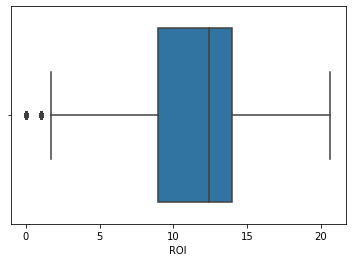

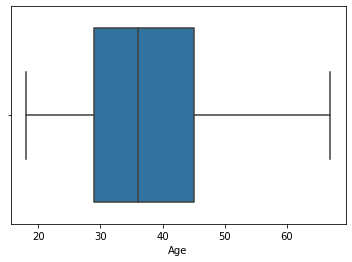

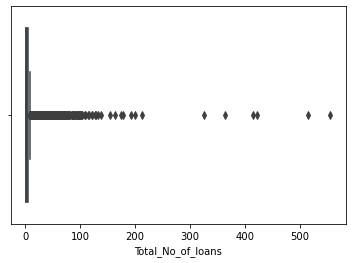

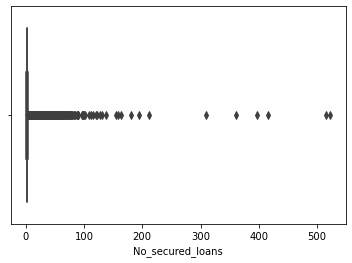

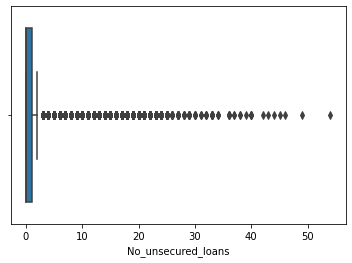

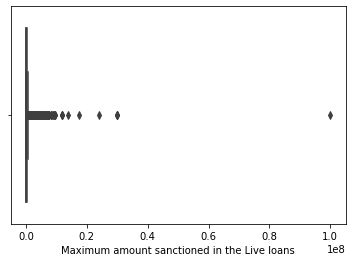

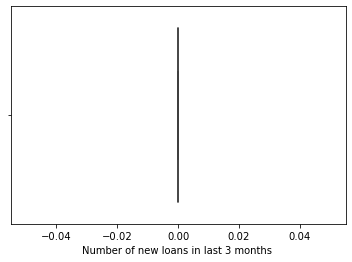

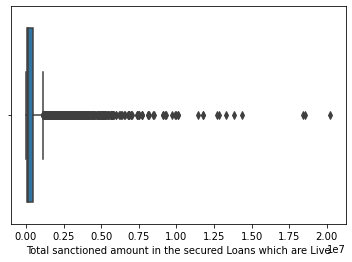

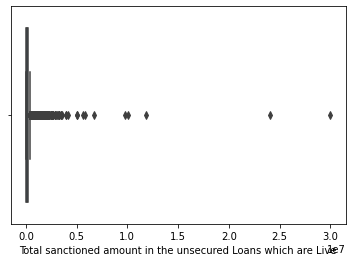

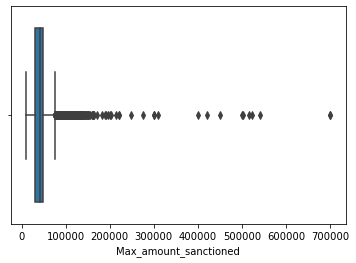

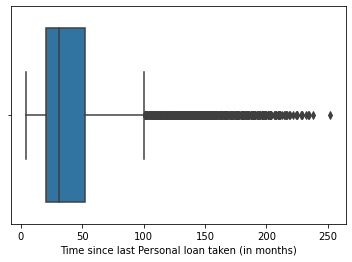

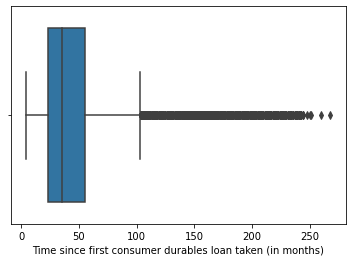

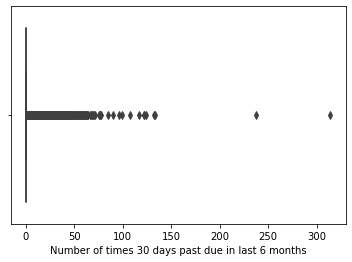

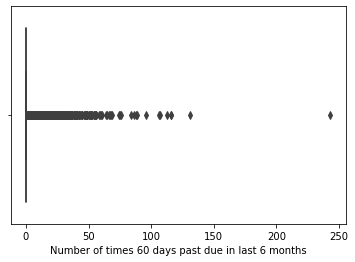

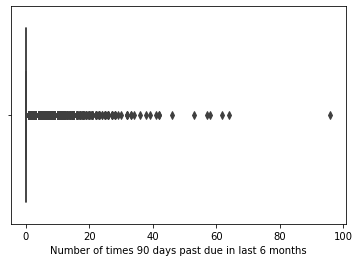

In [28]:
for i in df_TVS.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df_TVS,x=i)
    plt.show()

* Since it is a Financial dataset all the records will have an impact on business, so we are not removing/dropping the outliers.

# EDA

### UNIVARATE

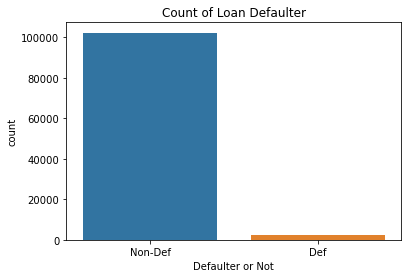

In [29]:
sns.countplot(data=df_TVS, x='Def/Non')
plt.title('Count of Loan Defaulter')
plt.xlabel('Defaulter or Not')
plt.show()

* From the above plot, we can conclude that the dataset is biased as the number of Non_defaulters are very high when compared to Defaulters.

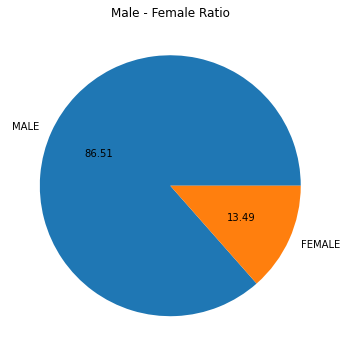

In [30]:
plt.figure(figsize=(12,6))
per=df_TVS['Gender'].value_counts()
plt.pie(x=per,labels=per.index,autopct='%1.2f')
plt.title('Male - Female Ratio')
plt.show()

* From the plot it is evident that Male customers are more in number when compared to Female customers.

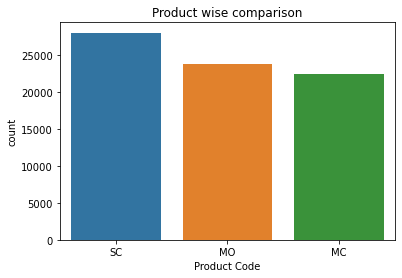

In [31]:
sns.countplot(data=df_TVS, x='Product_code')
plt.title('Product wise comparison')
plt.xlabel('Product Code')
plt.show()

* From the above plot, we can infer that two-wheeler vehicle loan is offered mostly for Scooters, followed by Mopeds and Motorcycles

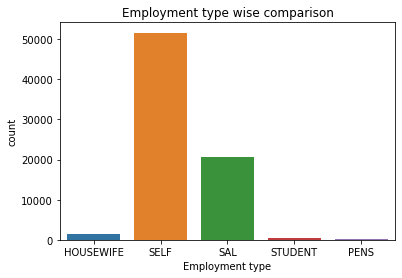

In [32]:
sns.countplot(data=df_TVS, x='Employment_type')
plt.title('Employment type wise comparison')
plt.xlabel('Employment type')
plt.show()

* From the above plot, we can infer that Self-Employed and Salaried customers are seeking the loan most.

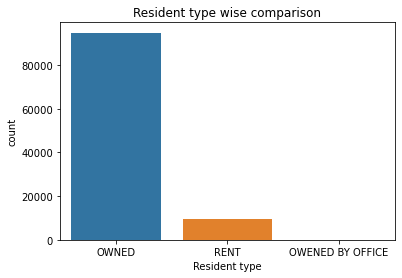

In [33]:
sns.countplot(data=df_TVS, x='Resident_type')
plt.title('Resident type wise comparison')
plt.xlabel('Resident type')
plt.show()

* From the above plot, we can infer that customers who own a house opting the Two-wheeler loan most.

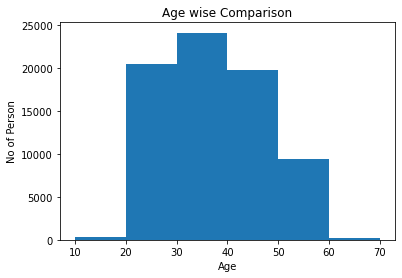

In [34]:
plt.hist(df_TVS['Age'],bins=[10,20,30,40,50,60,70])
plt.xlabel('Age')
plt.ylabel('No of Person')
plt.title('Age wise Comparison')
plt.show()

* From the above plot, we can infer that customer in the age bracket of 20-50 where opting the Two-wheelers loan most.

### Bi-Variate

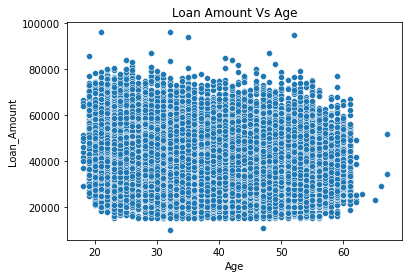

In [35]:
sns.scatterplot(data=df_TVS, x='Age', y='Loan_Amount')
plt.title('Loan Amount Vs Age')
plt.show()

* From the above plot, We can infer that Loan amount is independent of Age.

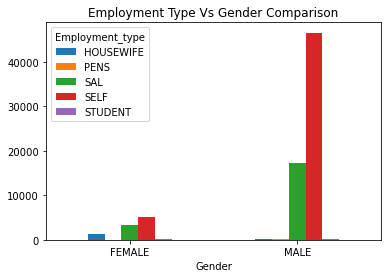

In [36]:
pd.crosstab(index=df_TVS['Gender'], columns=df_TVS['Employment_type']).plot(kind='bar',stacked=False)
plt.title('Employment Type Vs Gender Comparison')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plot, it is clearly visible that Customer who are Salaried and Self-employed seeking the loan most irrespective of Gender.

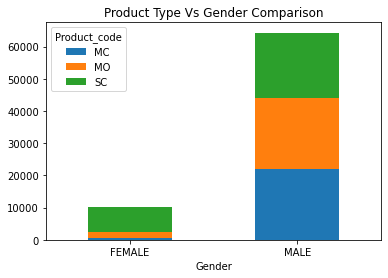

In [37]:
pd.crosstab(index=df_TVS['Gender'], columns=df_TVS['Product_code']).plot(kind='bar',stacked=True)
plt.title('Product Type Vs Gender Comparison')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plot, we infer that there is no significant difference in Product type among Male customers.
* Whereas Female customers prefer Scooters the most.

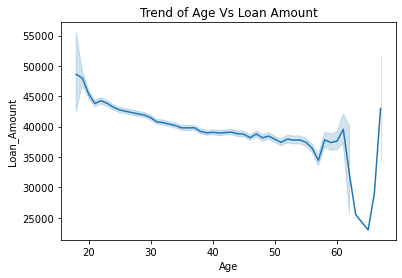

In [38]:
sns.lineplot(data=df_TVS, x='Age', y='Loan_Amount')
plt.title('Trend of Age Vs Loan Amount')
plt.show()

* From the above plot, we can infer that we have downward trend upto the age of 60.
* we can infer young age people prefer high end bikes, whereas as the age increases the usage of high end bikes decreases among the customers.


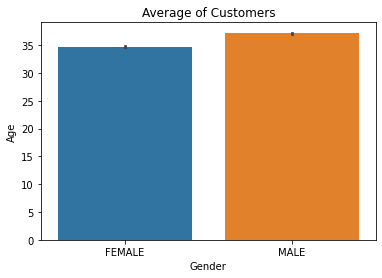

In [39]:
sns.barplot(data=df_TVS, x='Gender', y= 'Age')
plt.title('Average of Customers')
plt.show()

* From the above plot, we can infer that Average age of the Male and Female customers doesn't differ much.

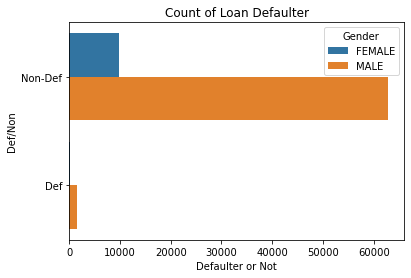

In [40]:
sns.countplot(data=df_TVS, y='Def/Non',hue='Gender')
plt.title('Count of Loan Defaulter')
plt.xlabel('Defaulter or Not')
plt.show()

* From the above plot we can conclude that females will not default their two-wheeler loans

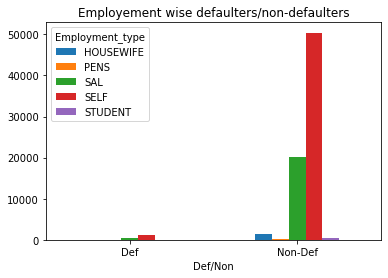

In [41]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Employment_type']).plot(kind='bar')
plt.title('Employement wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

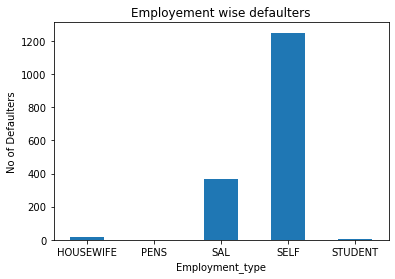

In [42]:
plt.title('Employement wise defaulters')
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Employment_type']).iloc[0,].plot(kind='bar')
plt.ylabel('No of Defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* From the above plots we can infer that self-employed are mostly non-defaulters. And very few defaulters are found in Housewife, Pensioners and Student categories when compared to salaried and Self-Employed.

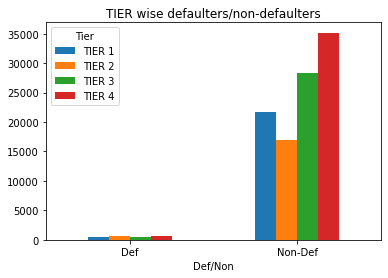

In [43]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Tier']).plot(kind='bar')
plt.title('TIER wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

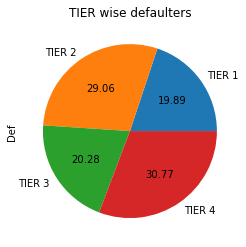

In [44]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Tier']).iloc[0,].plot(kind='pie', autopct='%1.2f')
plt.title('TIER wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* From the above 2 plots we can infer that the customers from tier 4 are mostly non – defaulters and no. of defaulters are almost same across all tiers.

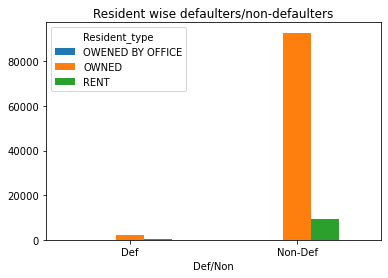

In [45]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Resident_type']).plot(kind='bar')
plt.title('Resident wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

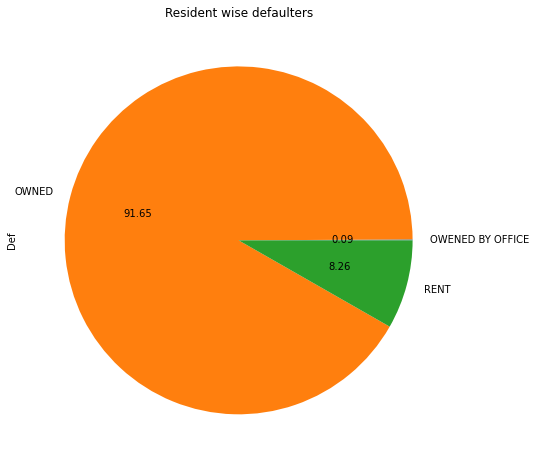

In [46]:
plt.figure(figsize=(8,8))
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Resident_type']).iloc[0,].plot(kind='pie',autopct='%1.2f')
plt.title('Resident wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* Customers with own house default their loans mostly when compared with other two categories.

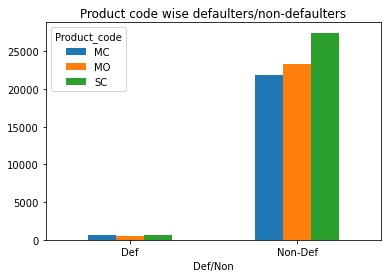

In [47]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Product_code']).plot(kind='bar')
plt.title('Product code wise defaulters/non-defaulters')
plt.xticks(rotation='horizontal')
plt.show()

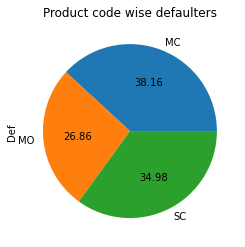

In [48]:
pd.crosstab(index=df_TVS['Def/Non'],columns=df_TVS['Product_code']).iloc[0,].plot(kind='pie', autopct='%1.2f')
plt.title('Product code wise defaulters')
plt.xticks(rotation='horizontal')
plt.show()

* The count of non-defaulters are high in Scooter category. Whereas the no of defaulters are nearly same across Motorcycle and Scooter categories

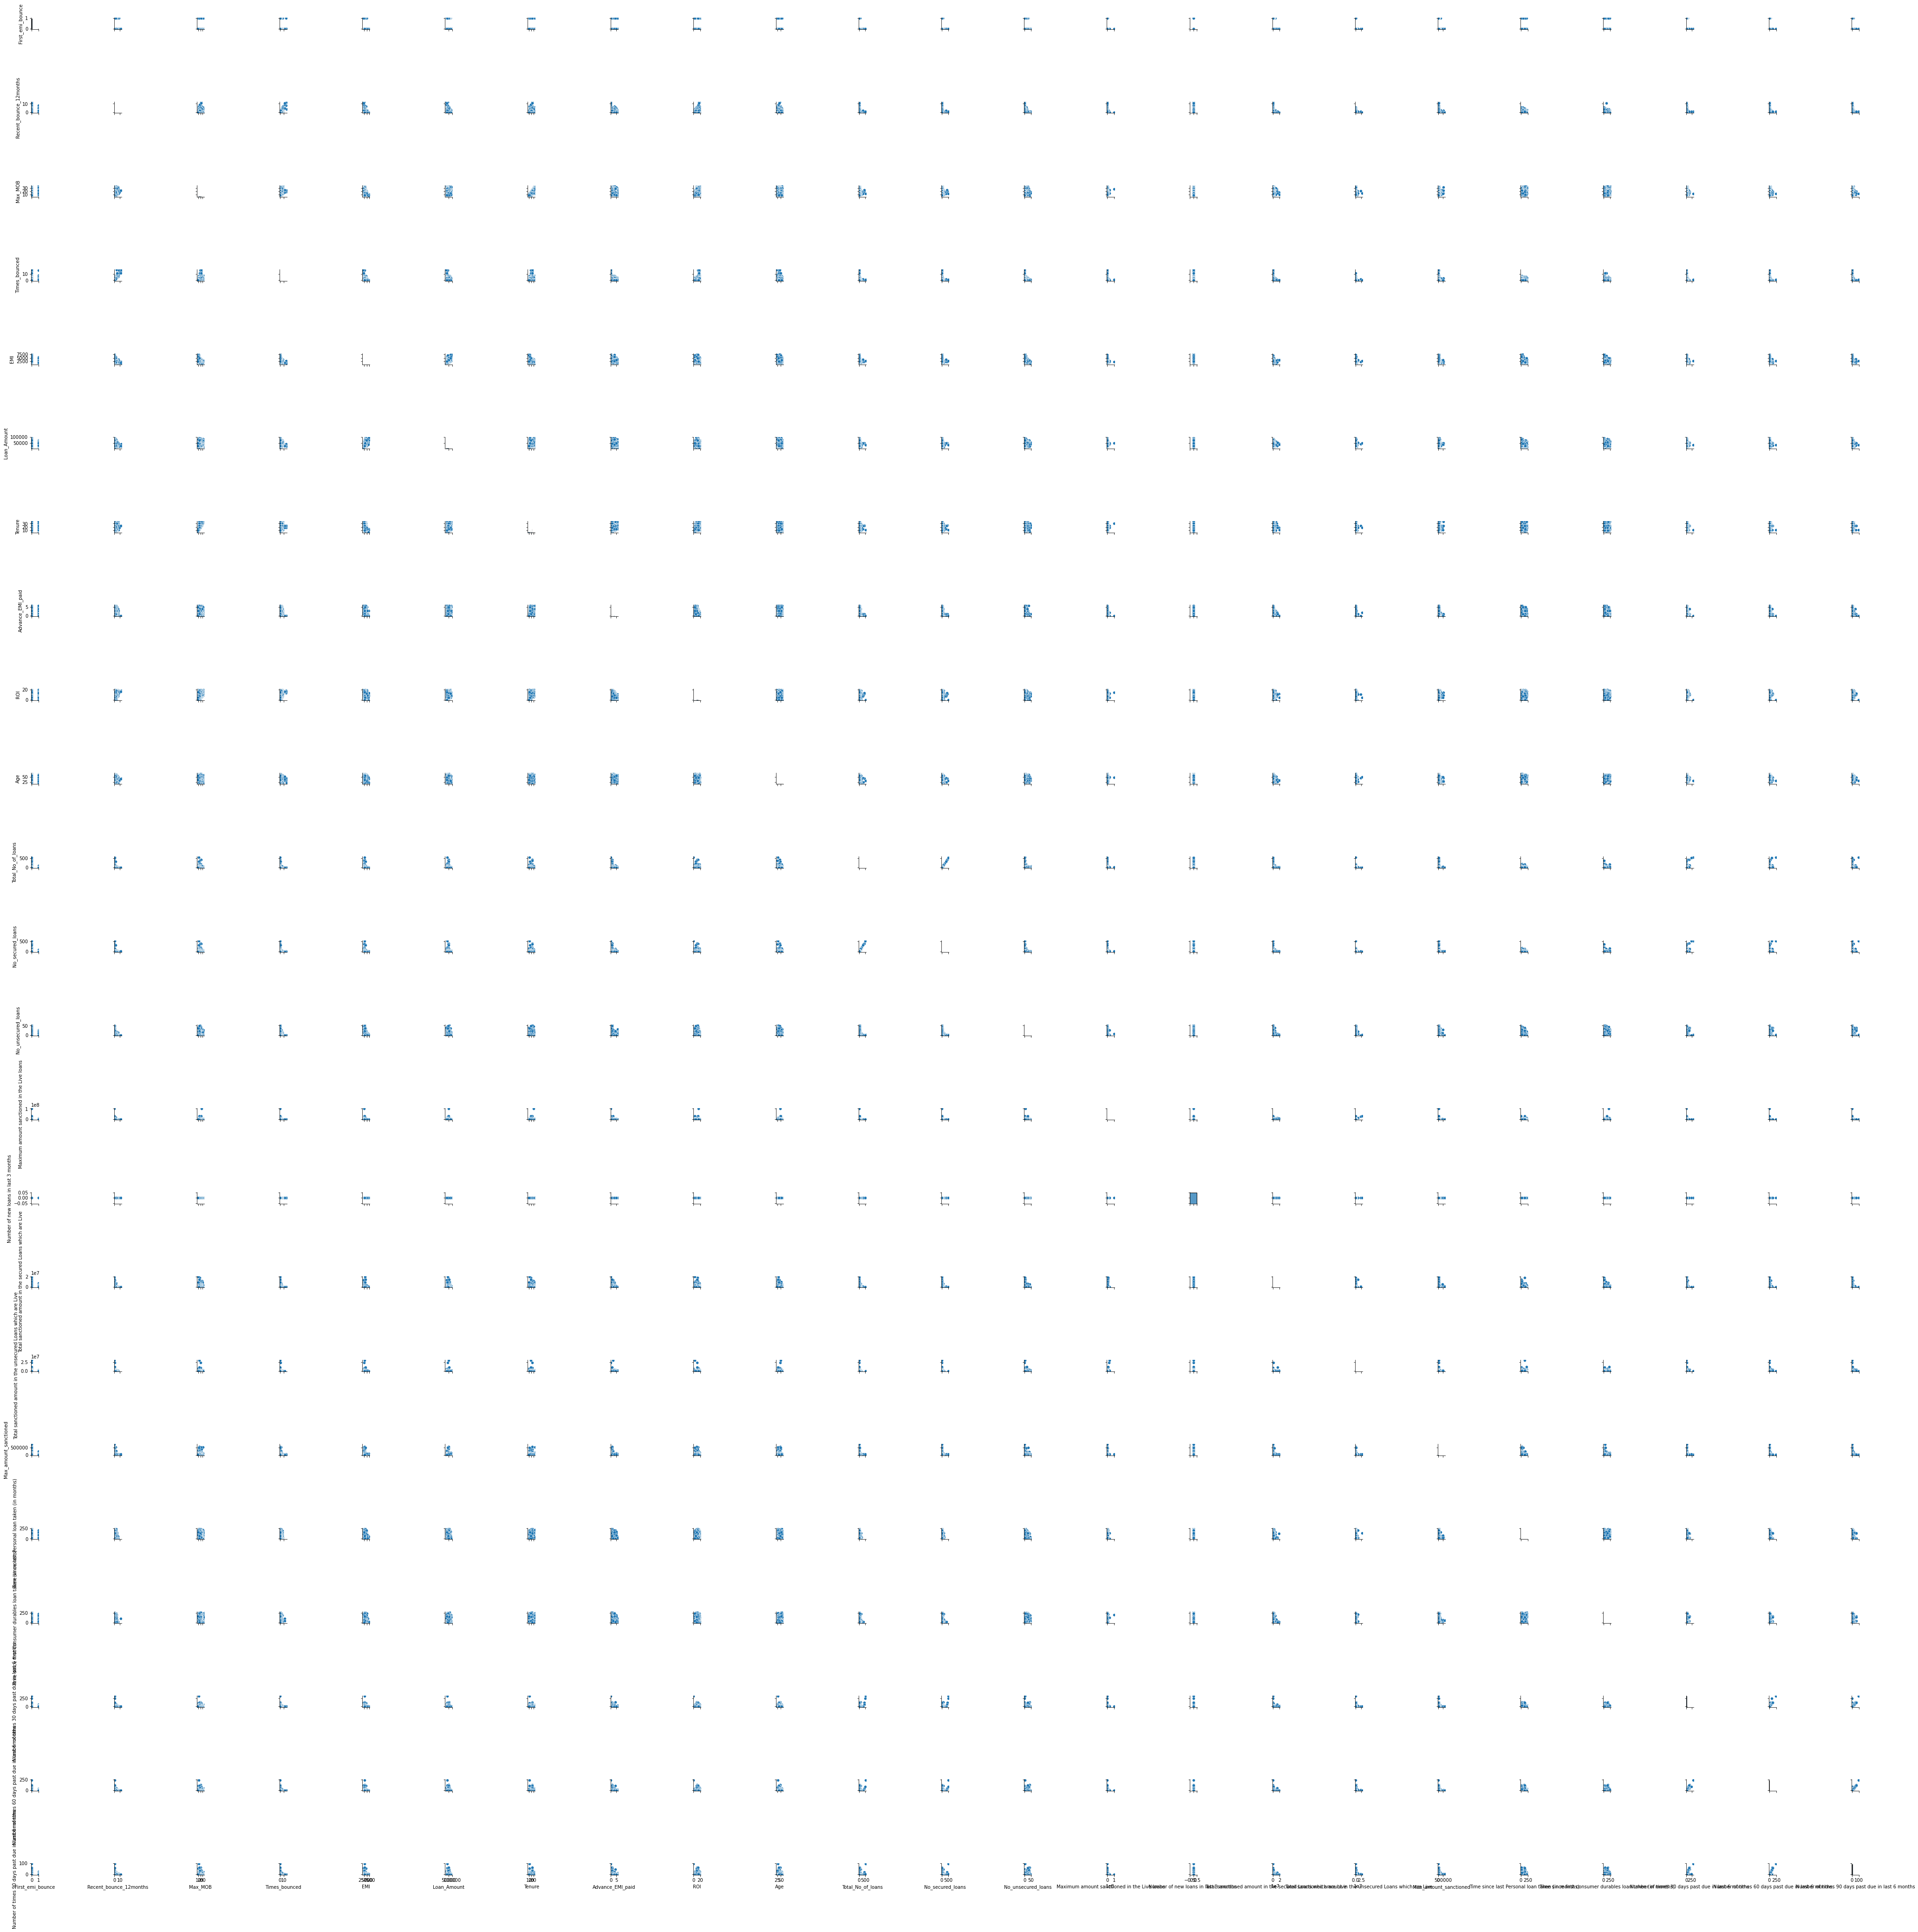

In [49]:
sns.pairplot(df_TVS.drop(columns='Dealer_codes'))
plt.show()

* From the above pair plot, we can infer that Loan Amount and EMI has postive Correlation.

In [50]:
pd.crosstab(index=df_TVS['Def/Non'], columns=df_TVS['Advance_EMI_paid'])

Advance_EMI_paid,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
Def/Non,,,,,,,
Def,1014,391,98,101,28,3,3
Non-Def,39428,22351,4803,4693,1150,184,72


* From the above table, we can see that customer who are paying advance EMI will also Default the Loan.

### SMOTE

In [51]:
num_col = df_TVS.select_dtypes(include=np.number)

In [52]:
cat_col = df_TVS.select_dtypes(exclude=np.number)
cat_col.head()

,Product_code,Gender,Employment_type,Resident_type,Tier,Def/Non
0,SC,FEMALE,HOUSEWIFE,OWNED,TIER 1,Non-Def
1,MO,MALE,SELF,RENT,TIER 1,Non-Def
2,SC,MALE,SELF,RENT,TIER 1,Non-Def
3,SC,FEMALE,SAL,RENT,TIER 1,Non-Def
4,MC,MALE,SAL,RENT,TIER 1,Non-Def


In [53]:
X = df_TVS.drop(columns='Def/Non')
y = df_TVS['Def/Non']

In [54]:
y.value_counts()

Non-Def    102180
Def          2288
Name: Def/Non, dtype: int64

In [55]:
X = pd.get_dummies(X, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

* Here 0 for Defaulters and 1 for Non defaulters

In [56]:
smote = SMOTE(sampling_strategy=0.25)
X_sm,y_sm = smote.fit_resample(X,y)

NameError: name 'SMOTE' is not defined

In [ ]:
print(X_sm.shape)
y_sm.value_counts()

### SCALING

In [ ]:
mm = MinMaxScaler()

In [ ]:
X_ss = mm.fit_transform(X_sm)
X_sm = pd.DataFrame(data=X_ss, columns = X_sm.columns, index=X_sm.index)
X_sm.head()

### Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### MODEL BUlIDING

* Logisitc Regression
* KNN
* Decision Tree
* Random Forest

In [ ]:
def performance_all(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    f1_train_wt = f1_score(y_train,y_train_pred,average='weighted')
    f1_test_wt = f1_score(y_test,y_test_pred,average='weighted')
    acc_train = accuracy_score(y_train,y_train_pred)
    acc_test = accuracy_score(y_test,y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    scores = cross_val_score(model,X_train,y_train,cv=3,scoring='f1_weighted')
    bias = 1-np.mean(scores)
    var =  np.std(scores)/np.mean(scores)
    return str(model),acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var

In [ ]:
per_df = pd.DataFrame(columns=['Model','Acc_train','Acc_test',
                    'F1_train_wt','F1_test_wt','ROC_AUC_Score','Bias','Variance']) 

def alg(model,i):
    model.fit(X_train,y_train)
    mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var=performance_all(model)
    per_df.loc[i] = [mo,acc_train,acc_test,f1_train_wt,f1_test_wt,roc_auc,bias,var]
    return per_df

#### Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
alg(lr,0)

* Logistic Regression gives a Accuracy Score of 89% and we can't only rely on the Accuracy Score
* The Model has a good F1_score in both train and test dataset.

### KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
alg(knn,1)

* KNN classifier gives better Accuracy and F1 score than Logistic Regression.
* We can see that Bias has dropped significant.

### KNN Tuning

In [ ]:
params={'n_neighbors':list(range(3,10)),'weights':['uniform','distance']}
tunned_knn=GridSearchCV(param_grid=params,estimator=KNeighborsClassifier(),cv=5,scoring='f1_weighted')
tunned_knn.fit(X_train,y_train)

In [ ]:
tunned_knn_best_params=tunned_knn.best_params_
tunned_knn_best_params

In [ ]:
tunned_knn=KNeighborsClassifier(**tunned_knn_best_params)
alg(tunned_knn,2)

* We got Best Params as N_Neighbors=4 and weights=Distance
* There is an increase in over all performance of the Model compared to Simple KNN model.

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
alg(dt,3)

* Since it is a fully grown Decision Tree, it is overfitted Model
* We should carry on with Tunned Decision Tree.

## Tunned Decision Tree

In [ ]:
params={'max_depth':list(range(3,15)),'criterion':['gini','entropy']}
tunned_dt=GridSearchCV(param_grid=params,estimator=DecisionTreeClassifier(),cv=5,scoring='f1_weighted')
tunned_dt.fit(X_train,y_train)

In [ ]:
best=tunned_dt.best_params_
best

In [ ]:
tunned_dt=DecisionTreeClassifier(**best)
alg(tunned_dt,4)

* From the Tunned Decision Tree, we have got the criterion as Gini with a max_depth of 14.
* Here we can see that the Model is generalized.

### RANDOM FOREST

In [ ]:
rf = RandomForestClassifier()

In [ ]:
alg(rf,5)

* We have a good improvement in Accuracy, F1_weighted and ROC_AUC_Score.
* Significant drop in basis and Variance, which also a good sign.

### Tunned Random Forest

In [ ]:
params={'n_estimators':[75,100,125],'max_depth':list(range(8,15)),'criterion':['entropy']}
tunned_rf=GridSearchCV(param_grid=params,estimator=RandomForestClassifier(),cv=5,scoring='f1_weighted')
tunned_rf.fit(X_train,y_train)

In [ ]:
best=tunned_rf.best_params_
best

In [ ]:
tunned_rf=RandomForestClassifier(**best)
alg(tunned_rf,6)

* In this Hypertuning of Random Forest with criterion as entropy, max_depth of 14 and n_estimators with 125 the Model has been generalized well.

### ADA Boosting Classifier

In [ ]:
params={'base_estimator': [LogisticRegression(),KNeighborsClassifier(n_neighbors=6),
                             DecisionTreeClassifier(max_depth=14,criterion=['gini','entropy'])],'n_estimators':[75,100,125]}
grd_srch_ada = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=3,scoring='f1_weighted')
grd_srch_ada.fit(X_train,y_train)

In [ ]:
best=grd_srch_ada.best_params_
best

In [ ]:
grd_srch_ada=AdaBoostClassifier(**best)
alg(grd_srch_ada,7)

* When comparing with all the other algorthims AdaBoostClassifier gives very less bias value.

# Gradient Boosting Classifier

In [ ]:
grd_srch = GradientBoostingClassifier()
grd_srch.fit(X_train,y_train)

In [ ]:
alg(grd_srch,8)

* Though there is decrease in Variance when compared to ADA Boosting classifier, the accuracy, F1 Scores and ROC_AUC_Score also reduces significantly
* So, this is not the best Model.

# XG Boost Classifier

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

In [ ]:
alg(xgb_model,9)

* From all the above Models, we can see that XGBoost gives good F1 and ROC_AUC scores with very less Bias and Variance too.
* So, the preferred Model for the Loan Defaulters is XGBoost with max_depth=10 and gamma = 1.

### Tunned Bagging (knn)

In [ ]:
#params={'base_estimator':[KNeighborsClassifier(n_neighbors=6, weights='distance')],'n_estimators':[125,150]}
#tunned_bagg_knn=GridSearchCV(estimator=BaggingClassifier(),param_grid=params,cv=5,scoring='f1_weighted')
#tunned_bagg_knn.fit(X_train,y_train)

In [ ]:
#best=tunned_bagg_knn.best_params_
#best

In [ ]:
#tunned_bagging_knn=BaggingClassifier(**best)
#alg(tunned_bagging_knn,8)